In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import glob
from tqdm import tqdm

In [18]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [36]:
# a list to collect paths of images
images_path = []
labels_path = []
masks_path = []

images_path = glob.glob('data/drone/original_images/*.jpg')
print(len(images_path))

labels_path = glob.glob('data/drone/label_images_semantic/*.png')
print(len(labels_path))

rgb_masks_path = glob.glob('data/drone/RGB_color_image_masks/*.png')
print(len(rgb_masks_path))

# Sort them
images_path = sorted(images_path)
labels_path = sorted(labels_path)
rgb_masks_path = sorted(rgb_masks_path)

400
400
400


In [38]:
resized_dims = (256, 256)

# create a list to store images
images = []
# iterate over 1000 image paths
for path in tqdm(images_path):
    # read file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    image = tf.image.resize(tf.image.decode_png(file, channels=3, dtype=tf.uint8), resized_dims, method='nearest')
    # append to the list
    images.append(image)


# create a list to store masks
labels = []
# iterate over 1000 mask paths
for path in tqdm(labels_path):
    # read the file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    label = tf.image.resize(tf.image.decode_png(file, channels=1, dtype=tf.uint8), resized_dims, method='nearest')
    # append mask to the list
    labels.append(label)

# create a list to store masks
rgb_masks = []
# iterate over 1000 mask paths
for path in tqdm(rgb_masks_path):
    # read the file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    rgb_mask = tf.image.resize(tf.image.decode_png(file, channels=3, dtype=tf.uint8), resized_dims, method='nearest')
    # append mask to the list
    rgb_masks.append(rgb_mask)

100%|██████████| 400/400 [01:47<00:00,  3.72it/s]


In [39]:
print(np.shape(images))
print(np.shape(labels))
print(np.shape(rgb_masks))

(400, 256, 256, 3)
(400, 256, 256, 1)
(400, 256, 256, 3)


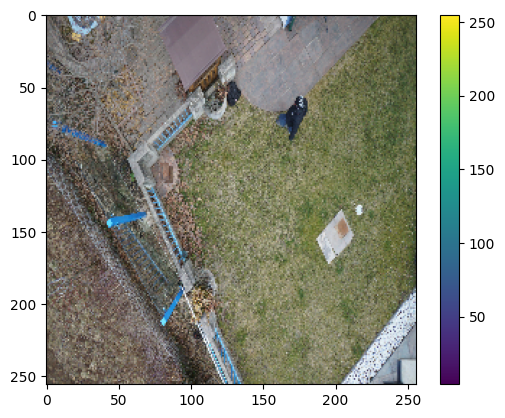

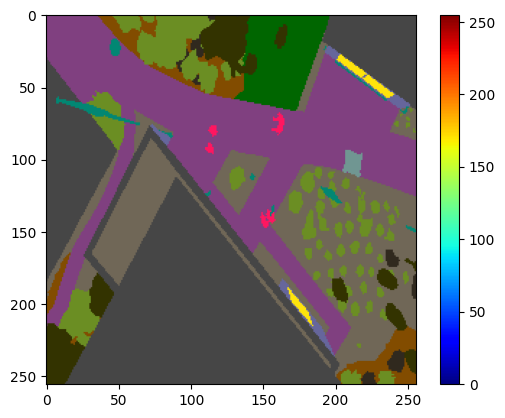

data/drone/original_images/005.jpg
data/drone/RGB_color_image_masks/005.png


In [40]:
#visualizing a resized image and respective mask
# plot an image
plt.imshow(images[5])
plt.colorbar()
plt.show()

#plot a mask
plt.imshow(rgb_masks[5], cmap='jet')
plt.colorbar()
plt.show()

print(images_path[5])
print(rgb_masks_path[5])